In [100]:
import os
import pickle
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from numpy import nan

In [101]:
files = [x for x in os.listdir('nonlethal_ERF_february/') if 'results' in x]

In [102]:
with open('nonlethal_ERF_february/paramgrid_nonlethalmutations.txt','rb') as f:
    param_grid = pickle.load(f)

In [103]:
all_results = []
for file in files:
    with open('nonlethal_ERF_february/'+file, 'rb') as f:
        result_file = pickle.load(f)
        for r in result_file['results']:
            all_results.append(r)
            
result_df = pd.DataFrame(all_results)

In [104]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

def calculate_ticks_log(ticklabels, truerange, tickrange):
    tick_labels = np.log(ticklabels)
    true_range = np.log(truerange)
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

In [105]:
result_df

,m,n1,ap,qd,b1,n2,n3,ttr,Y_control,Y_treatment
0,1500.000000,87,7.700000,0.999997,6.849,25213.000000,100,2,1.177040e+09,7.503309e+08
1,1500.000000,87,7.700000,0.999997,6.849,0.000000,0,2,9.332737e+09,1.664515e+10
2,7947.368421,87,7.700000,0.999997,6.849,18765.631579,100,2,1.075570e+09,5.202440e+08
3,14394.736842,87,7.757895,0.999997,6.849,12318.263158,100,2,7.868556e+08,3.486754e+08
4,1500.000000,87,8.394737,0.999997,4.566,25213.000000,100,2,1.962010e+08,1.177875e+08
...,...,...,...,...,...,...,...,...,...,...
1595,23421.052632,87,8.394737,0.999997,6.849,0.000000,0,2,2.009085e+08,1.201960e+08
1596,24710.526316,87,8.394737,0.999997,6.849,2002.473684,100,2,2.227815e+08,1.271536e+08
1597,24710.526316,87,8.394737,0.999997,6.849,0.000000,0,2,1.894414e+08,1.062895e+08
1598,26000.000000,87,8.394737,0.999997,6.849,713.000000,100,2,2.195096e+08,1.218184e+08


In [106]:
m_range = np.linspace(1500,26000,20)
a1_range = np.linspace(7.7,8.8,20)
b1_range = [0.9,0.6]
n2_range = [True, False]

In [114]:
df_00 = result_df[(result_df['b1'] == 0.9*7.61)&(result_df['n3'] == 0)]
df_01 = result_df[(result_df['b1'] == 0.6*7.61)&(result_df['n3'] == 0)]
df_10 = result_df[(result_df['b1'] == 0.9*7.61)&(result_df['n3'] != 0)]
df_11 = result_df[(result_df['b1'] == 0.6*7.61)&(result_df['n3'] != 0)]

In [115]:
matrix_00, matrix_01, matrix_10, matrix_11 = [np.zeros((20,20)) for _ in range(4)]

In [116]:
def parse_df(df, m_range, a1_range):
    
    mat = np.zeros((len(m_range), len(a1_range)))
    
    for m in range(len(m_range)):
        
        for a1 in range(len(a1_range)):
            
            df_sub_control = list(df[(df['m'] == m_range[m]) & (df['ap'] == a1_range[a1])]['Y_control'])[0]
            df_sub_treat = list(df[(df['m'] == m_range[m]) & (df['ap'] == a1_range[a1])]['Y_treatment'])[0]
            
            mat[len(m_range)-1-m, a1] = df_sub_treat/df_sub_control
            
    return(mat)

In [117]:
matrix_00 = parse_df(df_00, m_range, a1_range)
matrix_01 = parse_df(df_01, m_range, a1_range)
matrix_10 = parse_df(df_10, m_range, a1_range)
matrix_11 = parse_df(df_11, m_range, a1_range)

In [118]:
mticks_pos = [1500,5000,10000,15000,20000,26000]
mticks = 19-calculate_ticks(np.array(mticks_pos), [1500,26000], [0,19])

a1ticks_pos = [7.7,8.0,8.3,8.6,8.8]
a1ticks = calculate_ticks(np.array(a1ticks_pos), [7.7,8.8], [0,19])

In [128]:
text_pos = {(0,0): '$b_1$ = 0.9$\cdot$ $b$ \n$n_3$ = 0 \n$n_2$ = 0',
            (0,1): '$b_1$ = 0.6$\cdot$ $b$ \n$n_3$ = 0 \n$n_2$ = 0',
            (1,0): '$b_1$ = 0.9$\cdot$ $b$ \n$n_3$ = 100 \n$n_2$ = 29,900 - $n_1$ - $n_2$ - 3000',
            (1,1): '$b_1$ = 0.6$\cdot$ $b$ \n$n_3$ = 100 \n$n_2$ = 29,900 - $n_1$ - $n_2$ - 3000'}

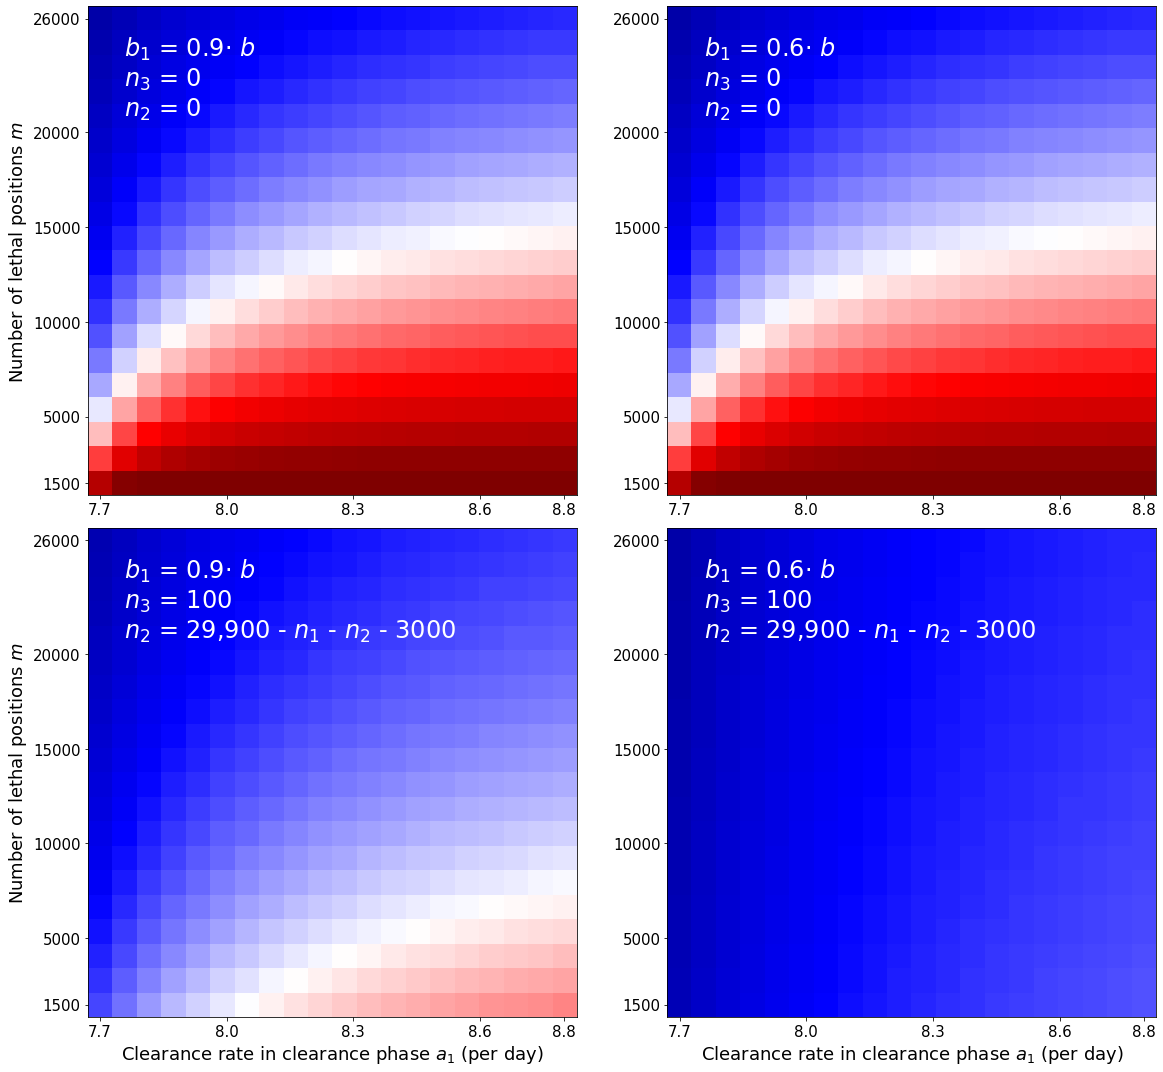

In [129]:
fig, ax = plt.subplots(2,2,figsize = (17,15))

ax[0,0].imshow(matrix_00, vmin = 0, vmax = 2, cmap = 'seismic')
ax[0,1].imshow(matrix_01, vmin = 0, vmax = 2, cmap = 'seismic')
ax[1,0].imshow(matrix_10, vmin = 0, vmax = 2, cmap = 'seismic')
ax[1,1].imshow(matrix_11, vmin = 0, vmax = 2, cmap = 'seismic')

for i in range(2):
    ax[i,0].set_ylabel('Number of lethal positions $m$', fontsize = 18)
    ax[1,i].set_xlabel('Clearance rate in clearance phase $a_1$ (per day)', fontsize = 18)
    for j in range(2):
        ax[i,j].set_yticks(mticks)
        ax[i,j].set_yticklabels(mticks_pos, fontsize = 15)
        ax[i,j].set_xticks(a1ticks)
        ax[i,j].set_xticklabels(a1ticks_pos, fontsize = 15)
        ax[i,j].text(1,4,text_pos[(i,j)], fontsize = 24, c = 'white')
        
plt.tight_layout()
plt.savefig('nonlethal_deleterious_mutations_n1n2n3_FEB5.jpg', dpi = 600, bbox_inches = 'tight')